In [1]:
import numpy as np
from scipy.stats import multivariate_normal
import matplotlib.pyplot as plt

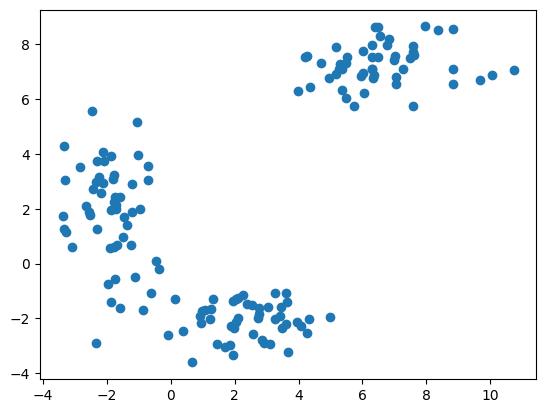

In [2]:
mean1 = [-2, 2]
cov1 = [[0.5, 0], [0, 2]]
data1 = np.random.multivariate_normal(mean1, cov1, 50)

mean2 = [2, -2]
cov2 = [[2, 0], [0, 0.5]]
data2 = np.random.multivariate_normal(mean2, cov2, 50)

mean3 = [7, 7]
cov3 = [[2, 0], [0, 0.5]]
data3 = np.random.multivariate_normal(mean3, cov3, 50)

data = np.concatenate((data1, data2, data3), axis=0)

plt.scatter(data[:, 0], data[:, 1])
plt.show()

In [3]:
def kMeans(X, k=2, num_iterations=5):
    m, n = X.shape

    # Initialize parameters
    centroids = X[np.random.permutation(m)[:k]]
    idx = np.zeros(m)

    for iteration in range(num_iterations):
        # Color the points
        for i in range(m):
            distance = []
            for j in range(k):
                norm = np.linalg.norm(X[i] - centroids[j])
                distance.append(norm)
            idx[i] = np.argmin(distance)

        # Moves the cluster centroid
        for j in range(k):
            points = X[idx==j]
            centroids[j] = np.mean(points, axis=0)

    return centroids, idx

In [4]:
centroids, idx = kMeans(data, k=3, num_iterations=50)

C:\Users\Minh\AppData\Local\Temp\ipykernel_2928\3796140602.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  plt.scatter(data[:, 0], data[:, 1], c=idx, cmap=plt.cm.get_cmap('brg'))


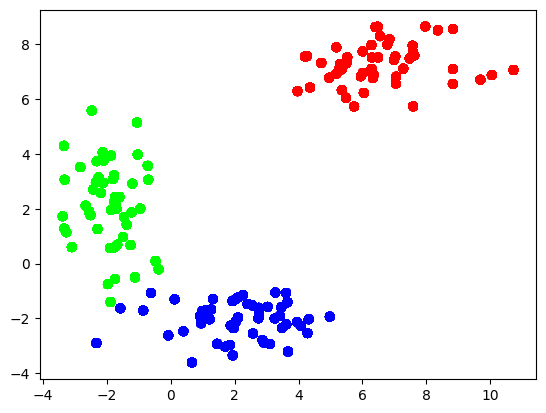

In [5]:
for i in range(len(idx)):
    plt.scatter(data[:, 0], data[:, 1], c=idx, cmap=plt.cm.get_cmap('brg'))
plt.show()

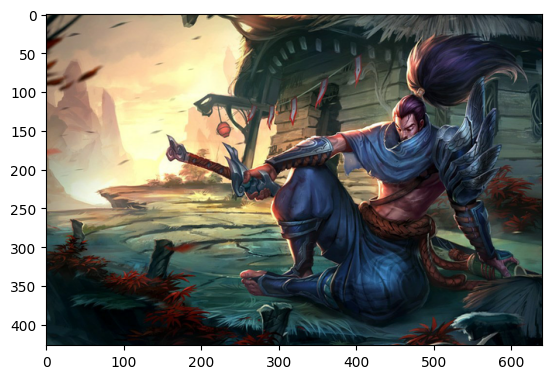

In [28]:
original_img = plt.imread('yasuo.png')
original_img = original_img[:, :, :3]
plt.imshow(original_img)

In [29]:
print(original_img.shape)

(427, 640, 3)


In [30]:
original_img = original_img / 255
X_img = np.reshape(original_img, (original_img.shape[0] * original_img.shape[1], 3))

In [31]:
centroids, idx = kMeans(X_img, k=10, num_iterations=10)

In [32]:
X_recovered = centroids[idx.astype(int), :]
X_recovered = np.reshape(X_recovered, original_img.shape)

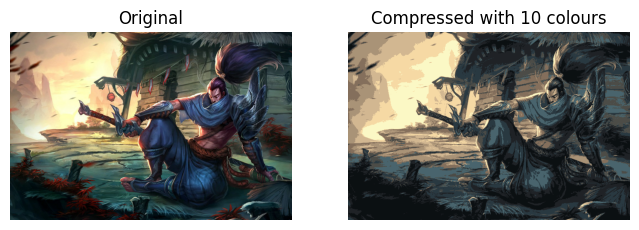

In [36]:
fig, ax = plt.subplots(1,2, figsize=(8,8))
plt.axis('off')

ax[0].imshow(original_img*255)
ax[0].set_title('Original')
ax[0].set_axis_off()

ax[1].imshow(X_recovered*255)
ax[1].set_title('Compressed with 10 colours')
ax[1].set_axis_off()